The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

# Import Data

In [3]:
df=load_digits()

In [4]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

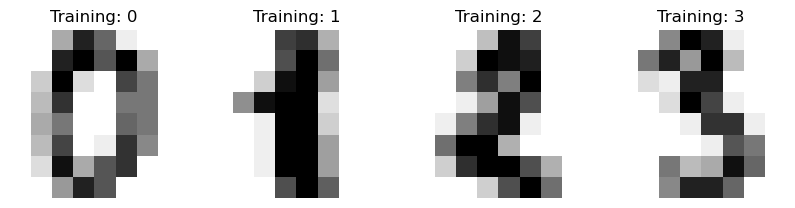

In [5]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [6]:
df.images.shape

(1797, 8, 8)

In [7]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [13]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf=RandomForestClassifier()

In [28]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=rf.predict(X_test)
y_pred

array([4, 3, 5, 5, 1, 0, 9, 1, 8, 6, 0, 9, 4, 8, 8, 9, 7, 0, 6, 2, 7, 2,
       7, 9, 7, 5, 3, 6, 6, 7, 9, 8, 6, 7, 8, 2, 0, 1, 4, 6, 0, 4, 8, 3,
       6, 5, 9, 2, 5, 2, 4, 0, 5, 8, 7, 3, 4, 0, 8, 3, 0, 1, 4, 2, 7, 7,
       1, 9, 5, 0, 4, 5, 0, 5, 3, 2, 2, 2, 2, 8, 0, 4, 2, 3, 3, 8, 2, 9,
       3, 7, 2, 4, 9, 3, 8, 6, 3, 1, 0, 9, 5, 3, 6, 4, 4, 3, 3, 6, 0, 0,
       5, 6, 6, 9, 8, 2, 8, 2, 2, 1, 5, 7, 3, 6, 8, 5, 8, 4, 9, 7, 7, 5,
       8, 3, 9, 8, 4, 2, 8, 0, 0, 7, 5, 8, 7, 8, 3, 8, 5, 2, 4, 0, 7, 5,
       4, 3, 0, 5, 5, 0, 3, 0, 3, 2, 4, 5, 3, 5, 7, 6, 9, 4, 2, 7, 6, 5,
       1, 3, 1, 9, 7, 7, 2, 6, 2, 0, 4, 4, 3, 5, 0, 9, 0, 1, 1, 4, 8, 2,
       1, 2, 8, 0, 4, 2, 7, 3, 2, 9, 0, 7, 3, 7, 5, 0, 8, 2, 9, 7, 3, 3,
       1, 2, 3, 6, 7, 2, 3, 0, 8, 7, 5, 6, 1, 1, 4, 3, 1, 5, 5, 7, 8, 5,
       3, 2, 0, 4, 2, 8, 6, 2, 8, 6, 9, 9, 1, 4, 0, 3, 7, 4, 5, 8, 4, 6,
       4, 4, 4, 7, 0, 6, 2, 1, 1, 4, 3, 5, 6, 5, 1, 6, 5, 9, 8, 6, 9, 1,
       7, 3, 2, 0, 5, 4, 7, 4, 0, 3, 6, 8, 7, 4, 0,

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[60,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 54,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  1, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 48,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 39]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        56
           3       1.00      0.98      0.99        56
           4       0.96      0.93      0.95        58
           5       0.98      0.96      0.97        56
           6       1.00      1.00      1.00        54
           7       0.91      0.98      0.95        54
           8       0.98      0.94      0.96        51
           9       0.89      0.93      0.91        42

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

